# Season-Mean Circulations

How did NDJF 2015-16 stack up to other years?

In [1]:
import pandas as pd
from paraguayfloodspy.pars import GetPars
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from paraguayfloodspy.visualize import GetRowCol

In [2]:
%matplotlib inline

Get parameters

In [3]:
rpy_rgn = GetPars('rpy_rain')
savefigs = True

Read in raw data

In [4]:
prcp = xr.open_dataarray("../_data/rainfall/subset/cpc_raw.nc")
prcp_rpy = prcp.sel(lon = slice(rpy_rgn['lonmin'], rpy_rgn['lonmax']), 
                    lat = slice(rpy_rgn['latmin'], rpy_rgn['latmax'])).mean(dim=['lon', 'lat']).to_dataframe()
prcp_rpy = prcp_rpy['1979-11-01':'2016-02-29']
prcp_rpy['year'] = prcp_rpy.index.year
prcp_rpy['month'] = prcp_rpy.index.month
prcp_rpy['year_adj'] = prcp_rpy['year']
prcp_rpy.loc[np.in1d(prcp_rpy['month'], [11, 12]), 'year_adj'] += 1
prcp_rpy = prcp_rpy.loc[np.in1d(prcp_rpy['month'], [11, 12, 1, 2])]
prcp_rpy.head()

,rain,year,month,year_adj
time,,,,
1979-11-01,8.292169,1979,11,1980
1979-11-02,0.107124,1979,11,1980
1979-11-03,0.060489,1979,11,1980
1979-11-04,0.190260,1979,11,1980
1979-11-05,0.012385,1979,11,1980


## By Year

Plot season

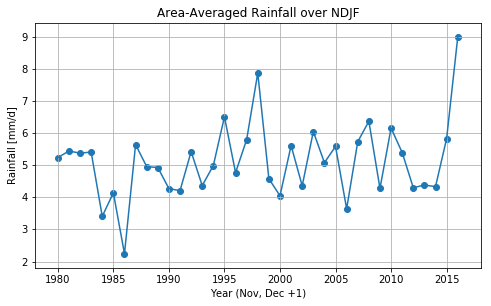

In [5]:
by_yr = prcp_rpy.groupby('year_adj').mean()
plt.figure(figsize=(8, 4.5))
plt.plot(by_yr.index, by_yr['rain'])
plt.scatter(by_yr.index, by_yr['rain'])
plt.grid()
plt.xlabel("Year (Nov, Dec +1)")
plt.ylabel("Rainfall [mm/d]")
plt.title("Area-Averaged Rainfall over NDJF")
if savefigs:
    plt.savefig("../_figs/SeasonalAvgRainfall.pdf")

## By month

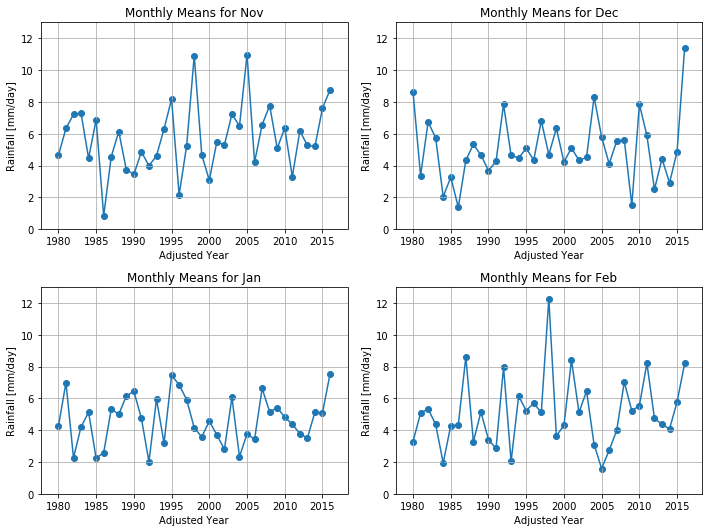

In [6]:
months = [11, 12, 1, 2]
month_name = ['Nov', 'Dec', 'Jan', 'Feb']
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 7.5))
for i,m in enumerate(months):
    ax = GetRowCol(i, axes)
    sub = prcp_rpy.query('month=={}'.format(m))
    sub = sub.groupby('year_adj').mean()
    ax.plot(sub.index, sub['rain'])
    ax.scatter(sub.index, sub['rain'])
    ax.set_xlabel("Adjusted Year")
    ax.set_ylabel("Rainfall [mm/day]")
    ax.set_title("Monthly Means for {}".format(month_name[i]))
    ax.grid()
    ax.set_ylim((0, 13))
plt.tight_layout()
if savefigs:
    plt.savefig("../_figs/MonthlymeanRainfall.pdf")